[활성화 함수] https://reniew.github.io/12/


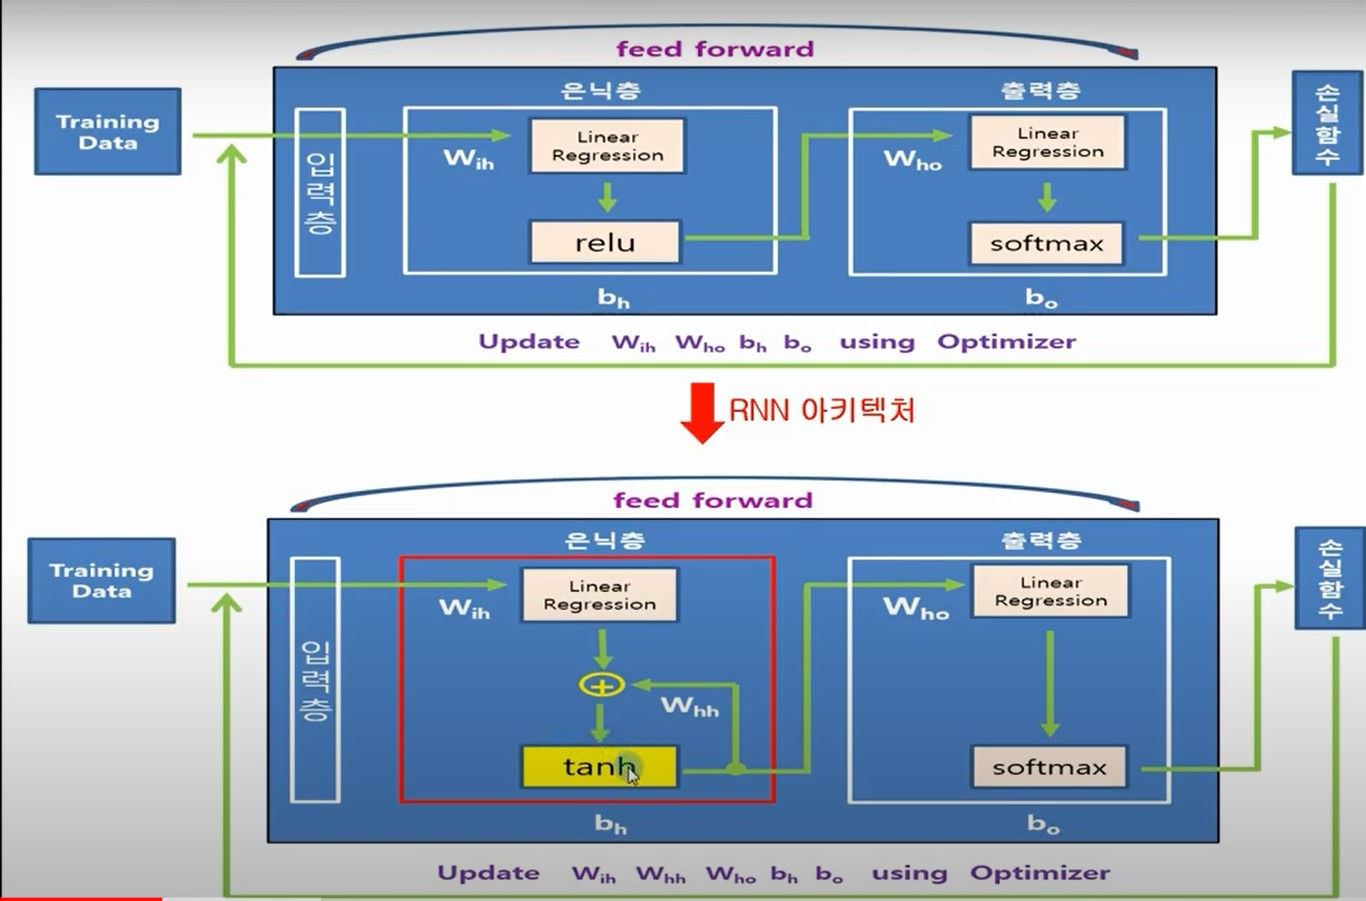

In [1]:
from IPython.display import Image 
Image('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/NLP/rnn1.jpg')


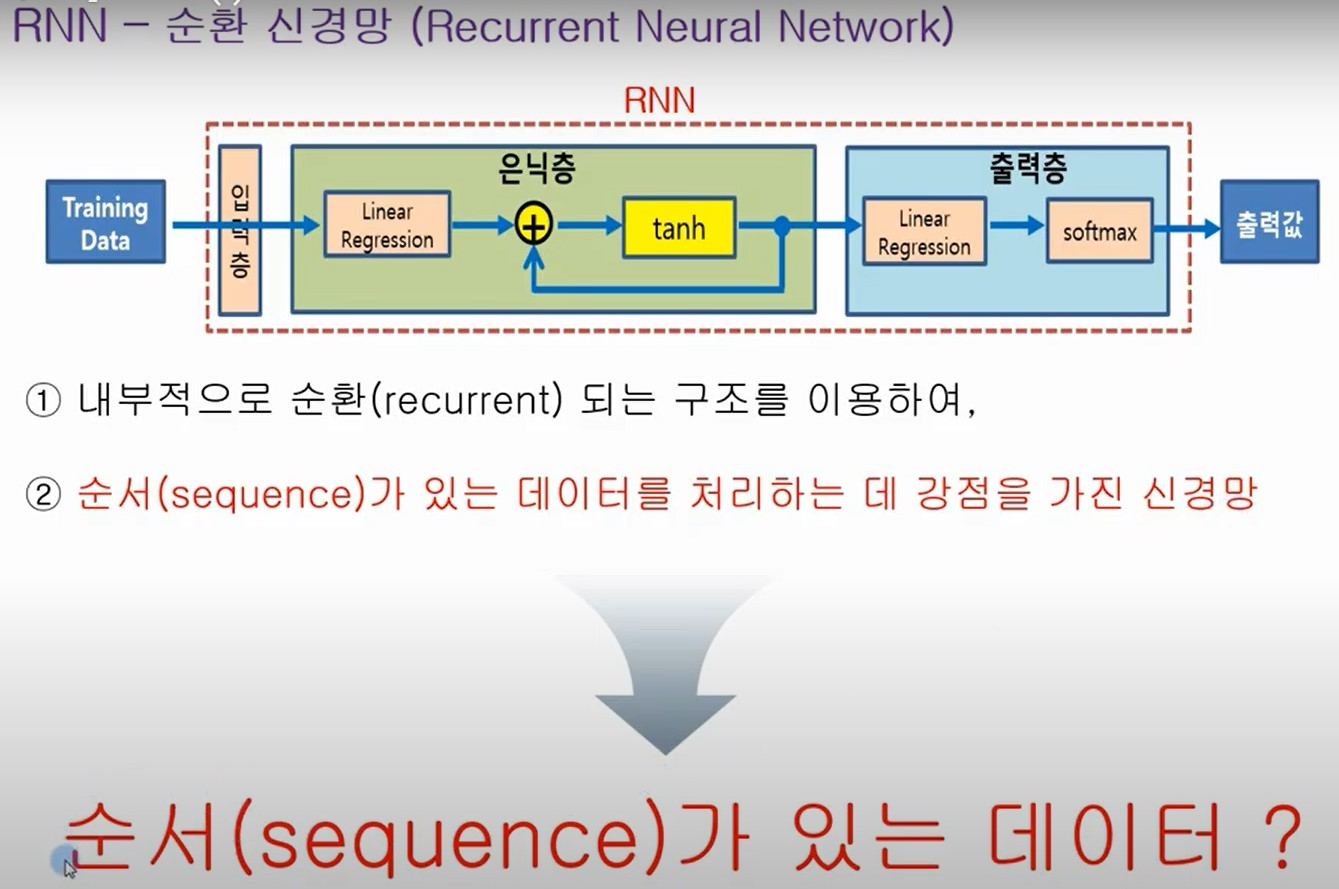

In [2]:
from IPython.display import Image 
Image('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/NLP/rnn2.jpg')

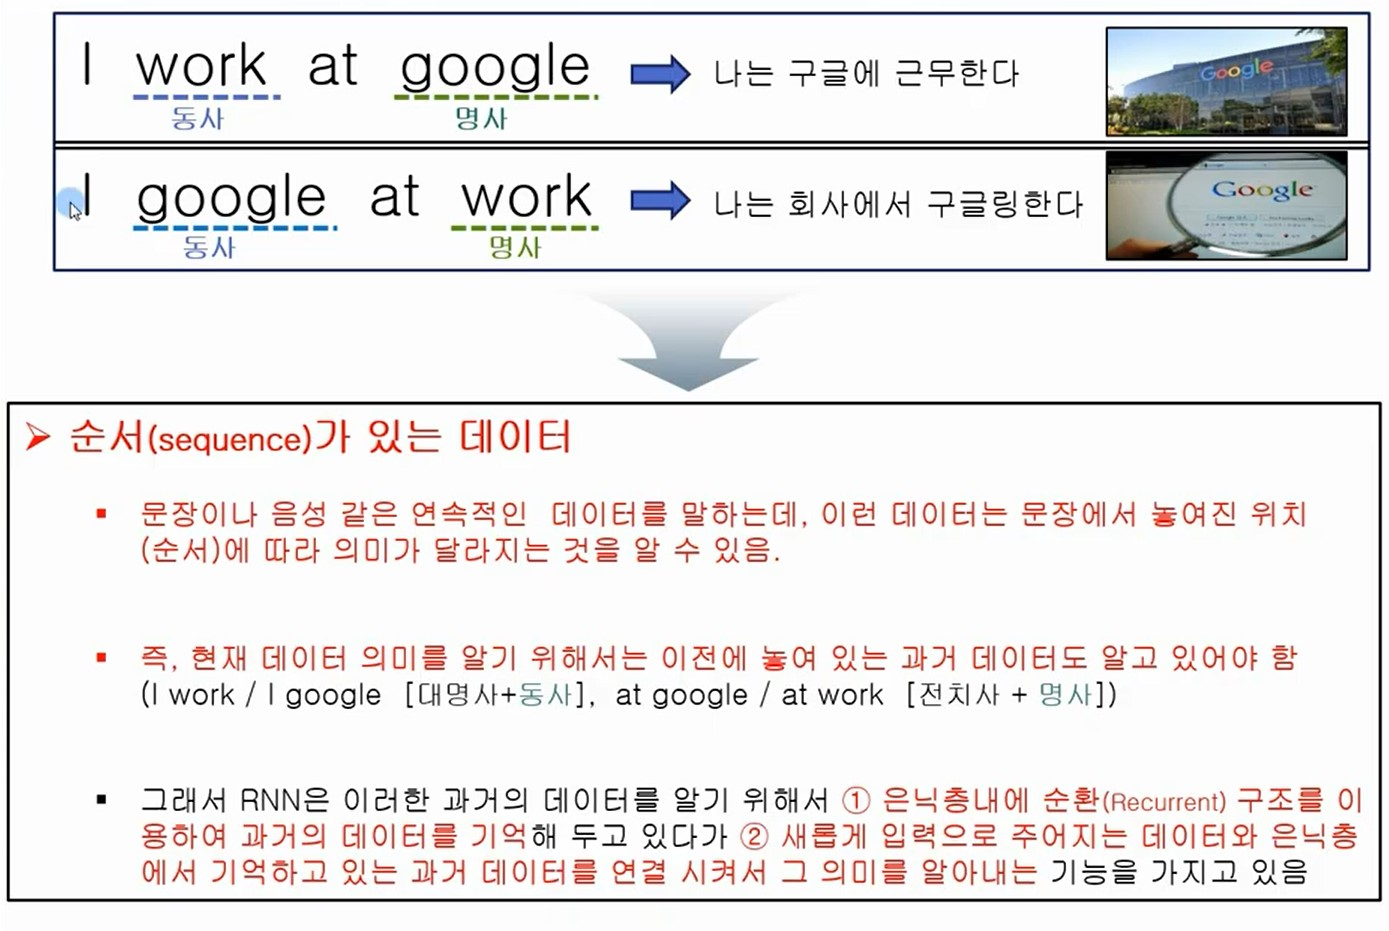

In [3]:
from IPython.display import Image 
Image('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/NLP/rnn3.jpg')

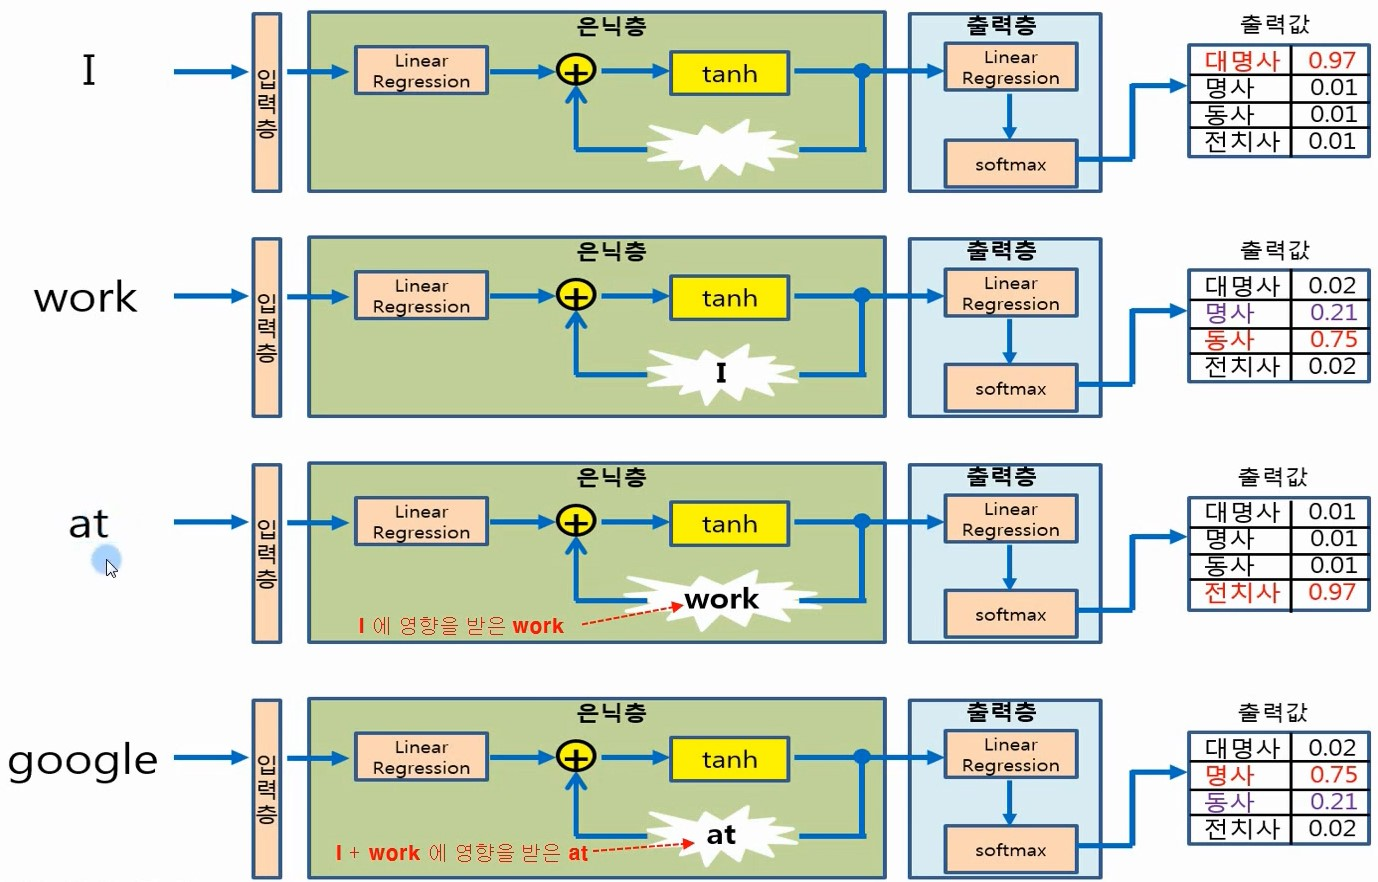

In [4]:
from IPython.display import Image 
Image('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/NLP/rnn4.jpg')

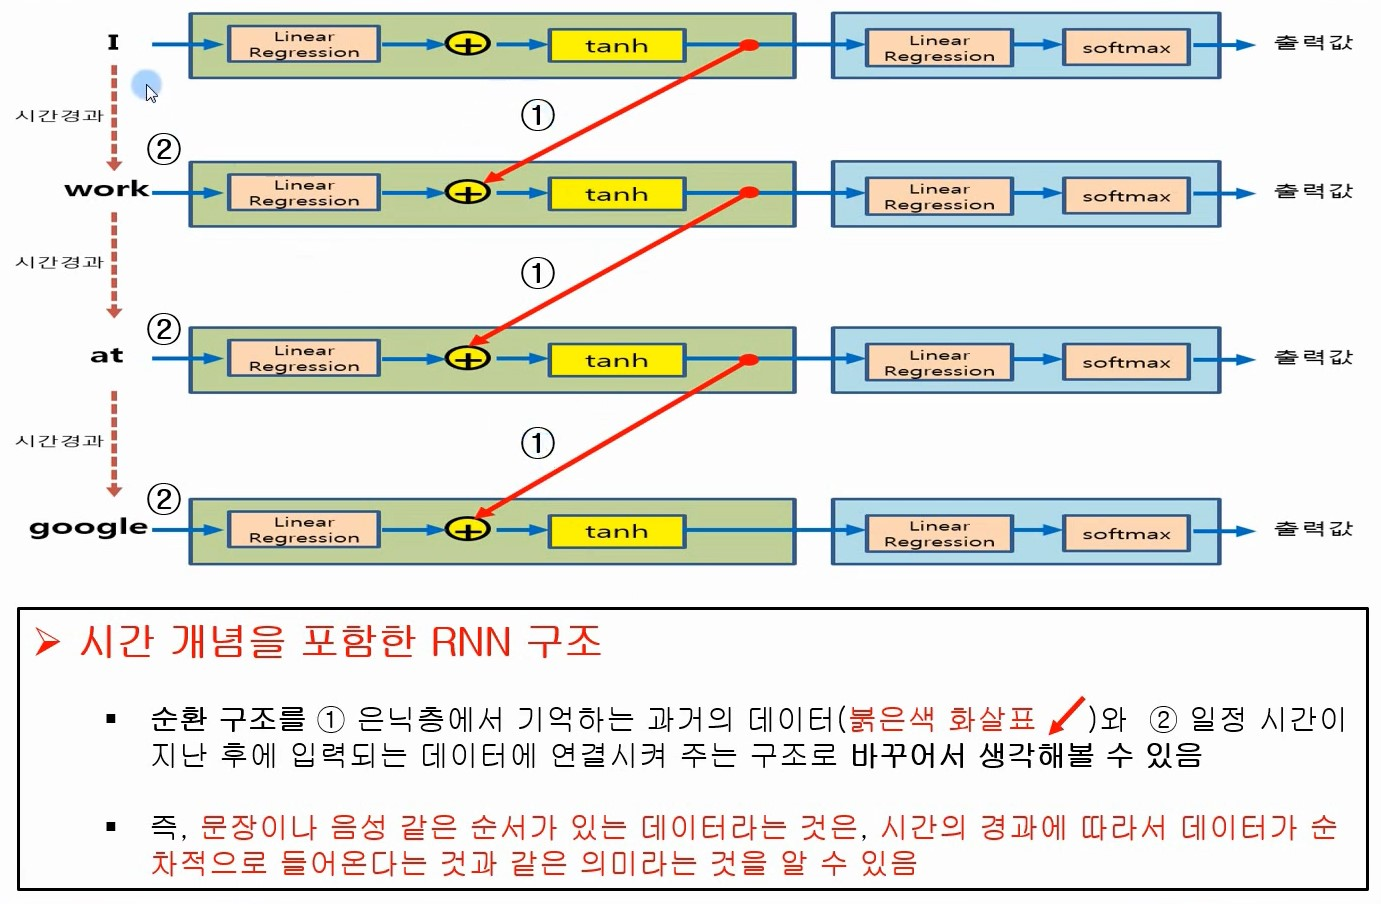

In [5]:
from IPython.display import Image 
Image('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/NLP/rnn5.jpg')

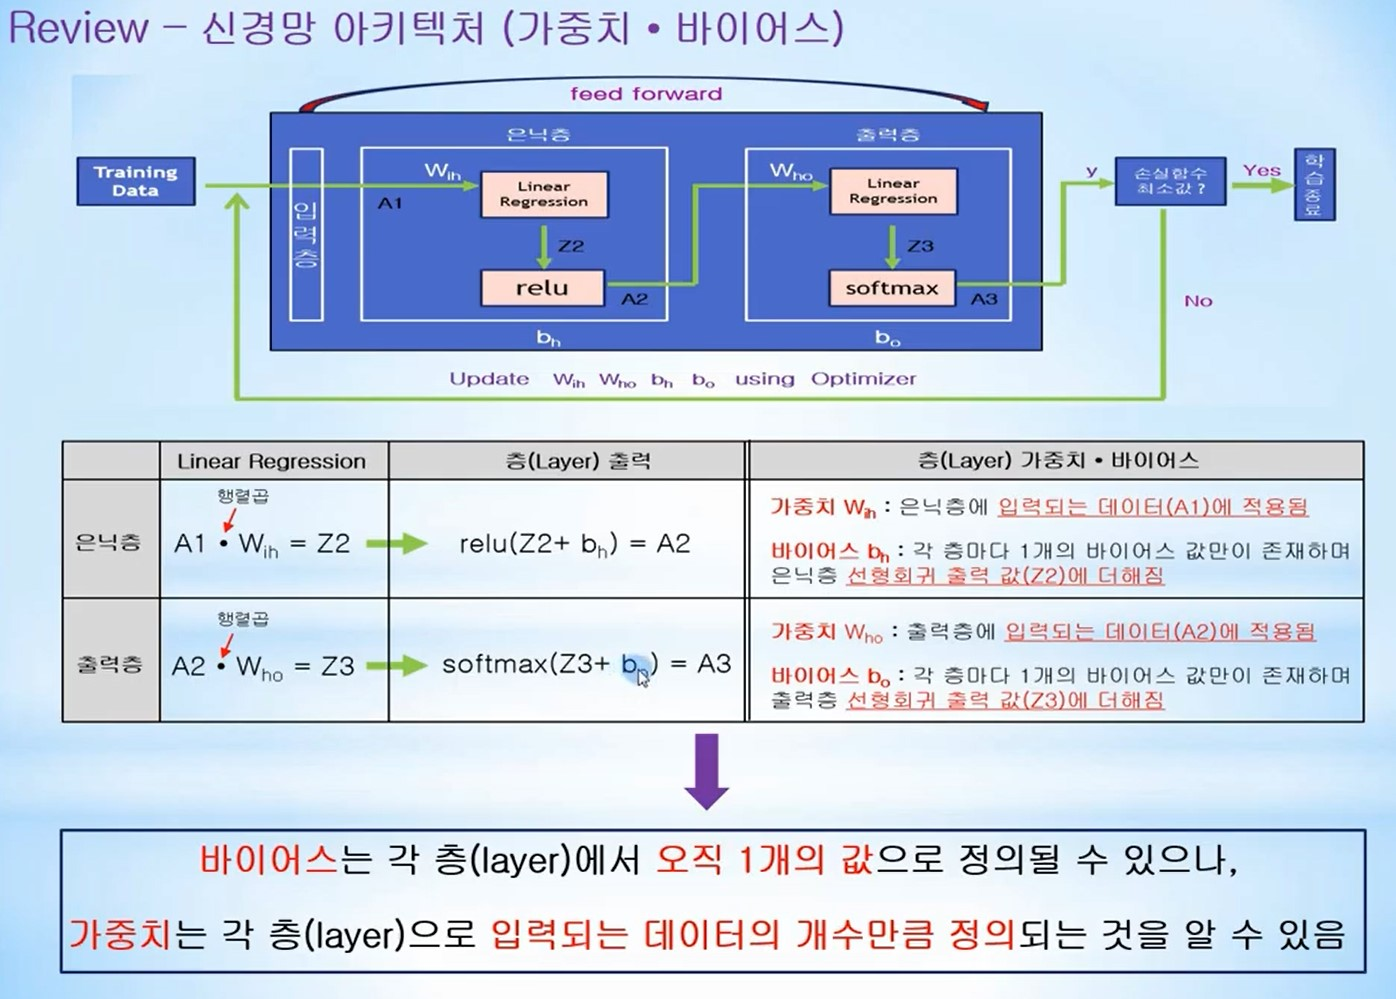

In [6]:
from IPython.display import Image 
Image('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/NLP/rnn6.jpg')

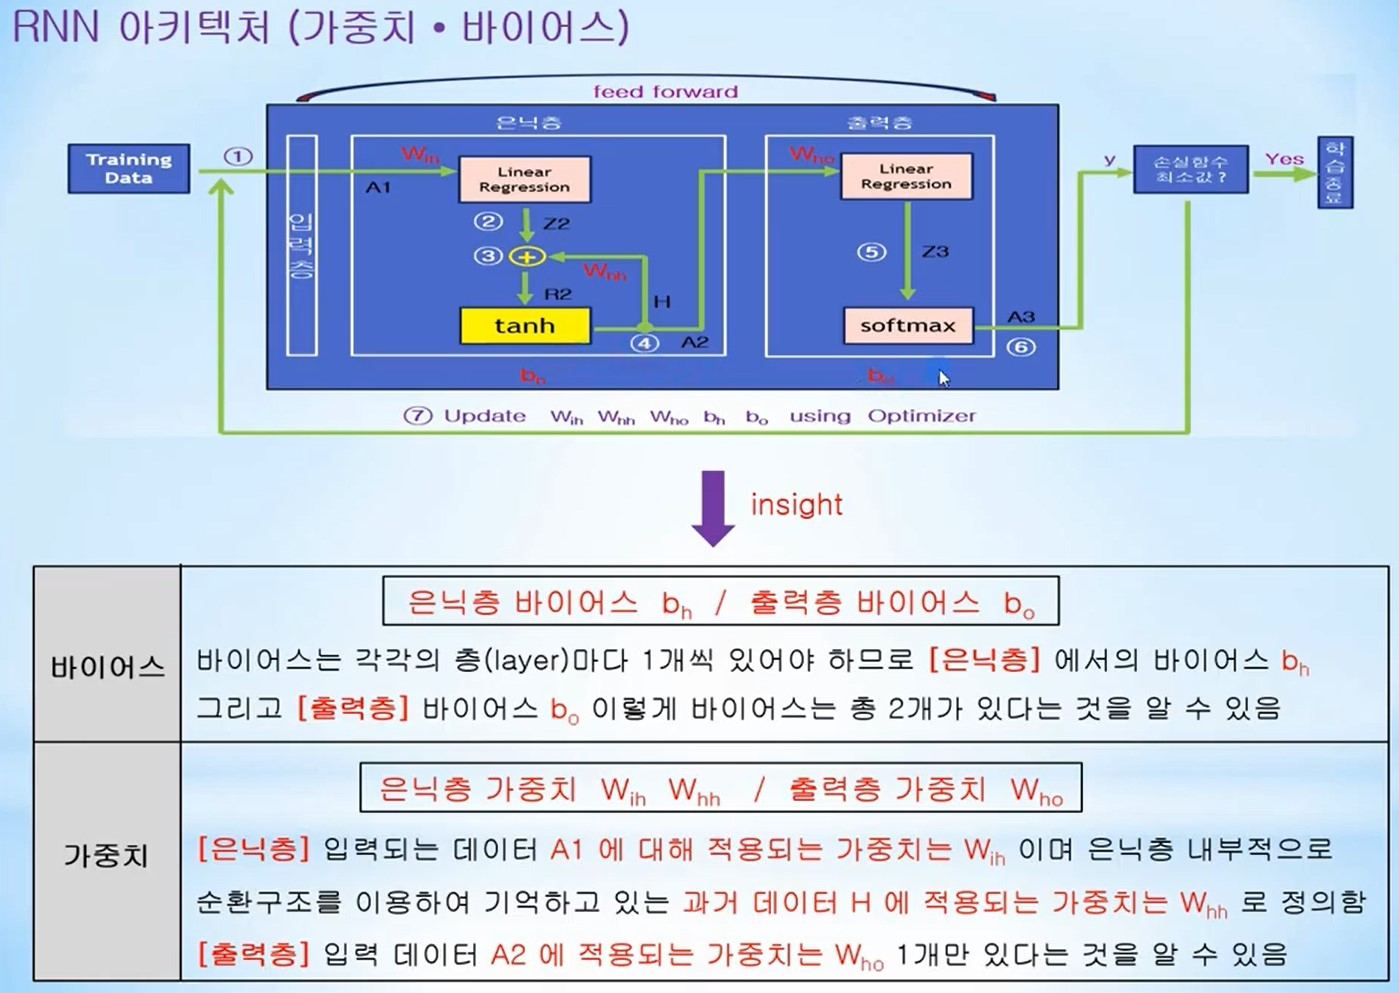

In [7]:
from IPython.display import Image 
Image('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/NLP/rnn7.jpg')

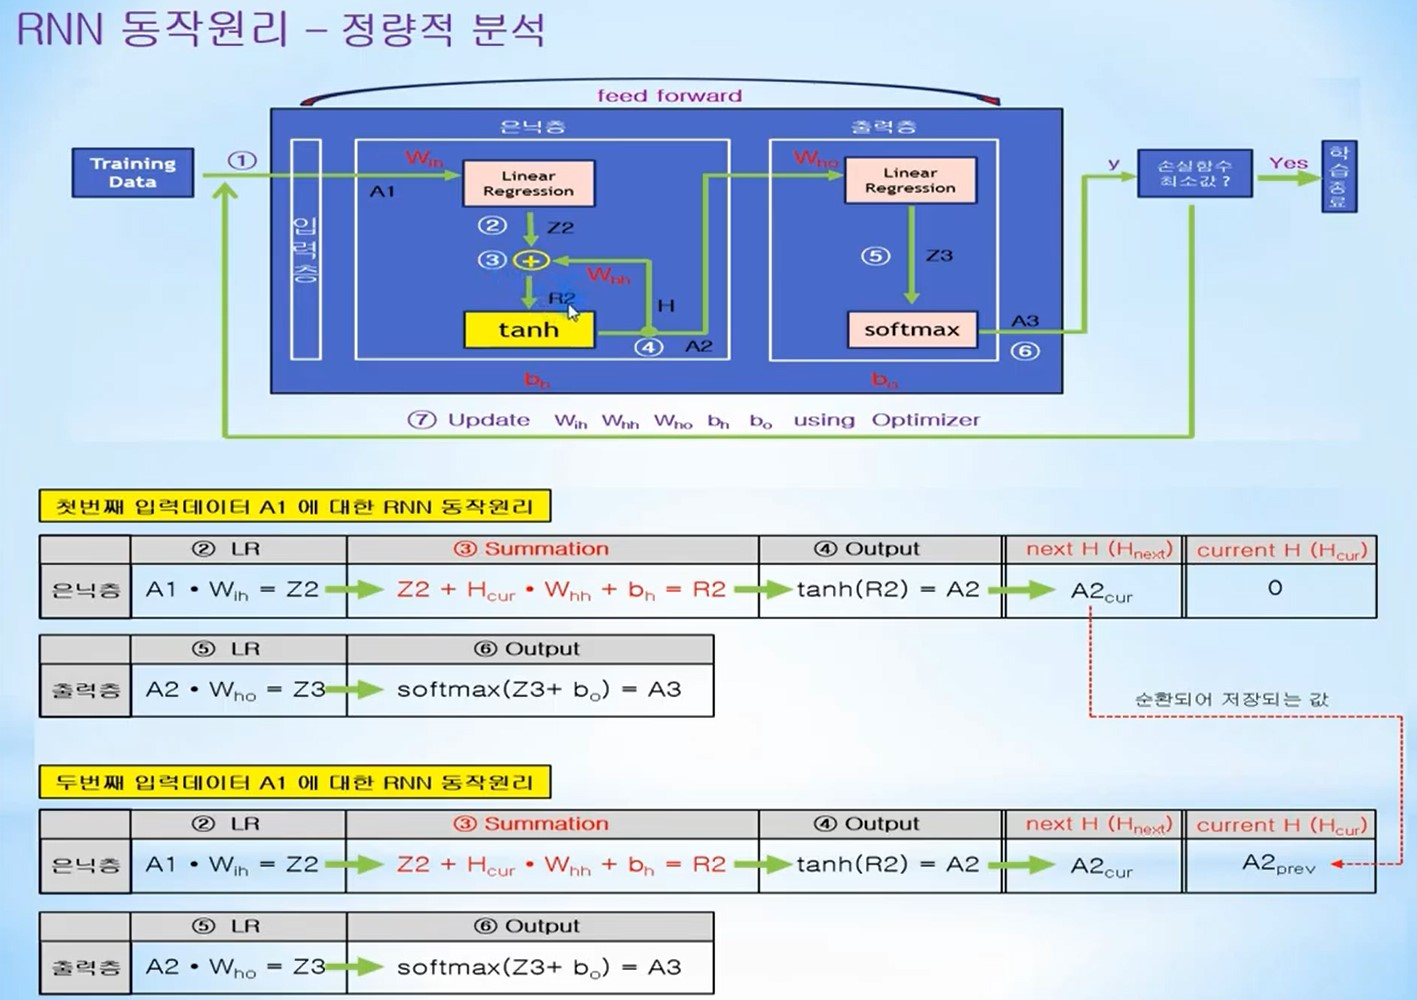

In [8]:
from IPython.display import Image 
Image('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/NLP/rnn8.jpg')

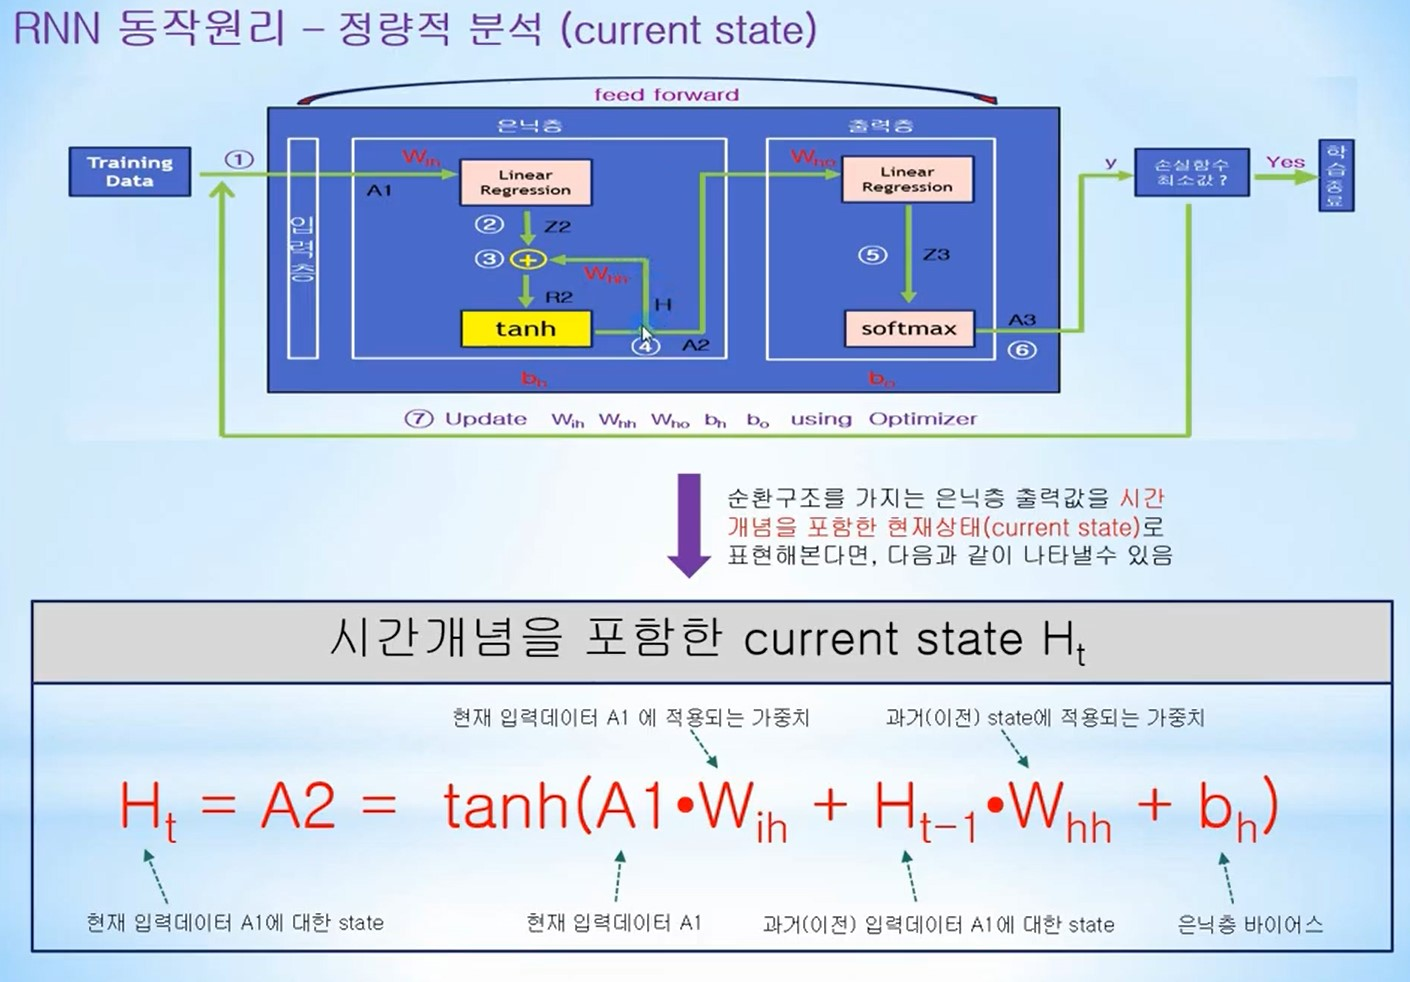

In [9]:
from IPython.display import Image 
Image('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/NLP/rnn9.jpg')

In [10]:
# 마지막 timestep만 출력
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 전체 상태 시퀀스를 반환
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


네트워크의 표현력을 증가시키기 위해 여러 개의 순환 층을 쌓는 것이 유용하다. 이런 설정에는 중간 층들이 전체 출력 시퀀스를 반환하도록 설정한다.

In [12]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용)
batch_size = 32

(input_train, y_train), ( input_test,y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

25000 훈련 시퀀스
25000 테스트 시퀀스
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [16]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 57s 339ms/step - loss: 0.6140 - acc: 0.6625 - val_loss: 0.4559 - val_acc: 0.8124
Epoch 2/10
157/157 [==============================] - 53s 338ms/step - loss: 0.3840 - acc: 0.8407 - val_loss: 0.4695 - val_acc: 0.7732
Epoch 3/10
157/157 [==============================] - 53s 336ms/step - loss: 0.3006 - acc: 0.8834 - val_loss: 0.3751 - val_acc: 0.8372
Epoch 4/10
157/157 [==============================] - 51s 325ms/step - loss: 0.2373 - acc: 0.9086 - val_loss: 0.3486 - val_acc: 0.8546
Epoch 5/10
157/157 [==============================] - 52s 334ms/step - loss: 0.2051 - acc: 0.9241 - val_loss: 0.3743 - val_acc: 0.8506
Epoch 6/10
157/157 [==============================] - 52s 335ms/step - loss: 0.1557 - acc: 0.9438 - val_loss: 0.5355 - val_acc: 0.7684
Epoch 7/10
157/157 [==============================] - 53s 335ms/step - loss: 0.1144 - acc: 0.9597 - val_loss: 0.4213 - val_acc: 0.8376
Epoch 8/10
157/157 [==============================] - 5

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


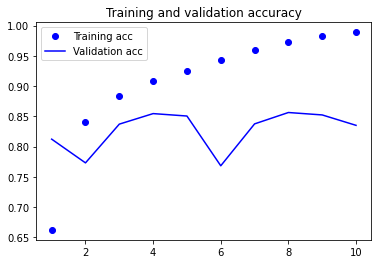

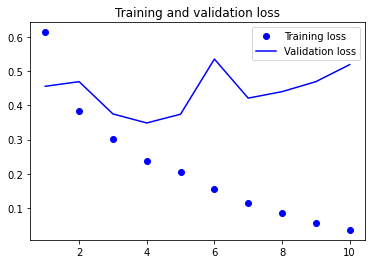

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


[과제] 85%로 기본 모델보다 성능이 좋지 않다. 이 문제를 해결하기 위하여 LSTM을 적용하여 과제를 수행하세요.